KNN classification using Sklearn

                  t_stamp  P1_STATE   LIT101.Pv  FIT101.Pv  MV101.Status  \
0     2019-12-06 10:05:00         3  658.661255        0.0             1   
1     2019-12-06 10:05:01         3  659.171600        0.0             1   
2     2019-12-06 10:05:02         3  659.681800        0.0             1   
3     2019-12-06 10:05:03         3  660.349100        0.0             1   
4     2019-12-06 10:05:04         3  660.780945        0.0             1   
...                   ...       ...         ...        ...           ...   
13196 2019-12-06 13:44:56         2  704.704800        0.0             1   
13197 2019-12-06 13:44:57         2  703.801941        0.0             1   
13198 2019-12-06 13:44:58         2  703.016900        0.0             1   
13199 2019-12-06 13:44:59         2  701.996338        0.0             1   
13200 2019-12-06 13:45:00         2  701.368300        0.0             1   

       P101.Status  P102.Status  P2_STATE  FIT201.Pv  AIT201.Pv  ...  \
0              

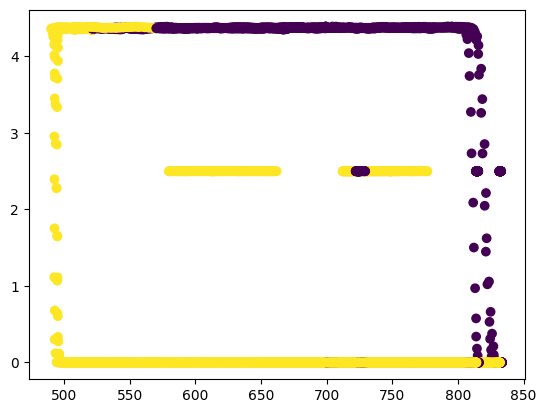

(4,)
[  3.       689.670959   0.         1.      ]
[[  3.       689.670959   0.         1.      ]]
(1, 4)
[2.]
[2.]
[2.]


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors as sk
from sklearn.model_selection import train_test_split

file_path = '/content/drive/MyDrive/Dec2019.xlsx'

# Load the  file
data2 = pd.read_excel(file_path)
print(data2)

# Convert the Excel data to a NumPy array, keeping only numeric data
numeric_data = data2.select_dtypes(include=[np.number])

# Ensure the data has the correct number of columns (4 features + 1 label)
if numeric_data.shape[1] < 5:
    raise ValueError("The dataset must contain at least 4 features and 1 label.")

X = numeric_data.iloc[:, :4].to_numpy()  # First 4 columns are features
y = numeric_data.iloc[:, 4].to_numpy()  # Fifth column is the label
# Remove rows where 'y' has NaN values
mask = ~np.isnan(y)
X_cleaned = X[mask]
y_cleaned = y[mask]

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.3, random_state=42)
print(X_cleaned.shape)
# Scatter plot
plt.scatter(X_cleaned[:, 1], X_cleaned[:, 2], c=y_cleaned)
plt.show()
# K-Nearest Neighbors (KNN)
knn = sk.KNeighborsClassifier(n_neighbors=3)
# Fit the KNN model
knn.fit(X_cleaned, y_cleaned)  # Use cleaned data
print(X_cleaned[110, :].shape)
print(X_cleaned[110, :])
print(X_cleaned[110, :][np.newaxis])
print(X_cleaned[110, :][np.newaxis].shape)

p = knn.predict(X_cleaned[10, :][np.newaxis])
print(p)

q = knn.predict(np.array([6, 3, 5, 2])[np.newaxis])
print(q)

q2 = knn.predict(np.array([[6, 3, 5, 2]]))
print(q2)

The Distance Formula

In [6]:
# Calculate Euclidean distance
def distance(a, b):
    return np.sqrt(np.sum(np.power((a - b), 2)))

a = X_cleaned[1, :][np.newaxis]
b = X_cleaned[100, :][np.newaxis]

print(distance(a, b))

# Distances from sample `a` to all points in `X_cleaned`
d = [distance(a, b) for b in X_cleaned]
print(d)

28.458200000000033
[0.5103450000000294, 0.0, 0.5101999999999407, 1.177500000000009, 1.609344999999962, 1.8447999999999638, 1.8840999999999894, 2.1588440000000446, 2.198099999999954, 2.4728999999999814, 3.022430999999983, 3.179399999999987, 3.257965000000013, 3.257965000000013, 3.4542000000000144, 3.8074649999999792, 4.199999999999932, 4.356999999999971, 4.631799999999998, 4.828034000000002, 4.906600000000026, 5.181299999999965, 5.495330999999965, 5.770099999999957, 5.809356999999977, 6.4766539999999395, 6.751435000000015, 7.0654610000000275, 7.536469000000011, 8.164499999999975, 8.478545999999938, 8.753299999999967, 8.831800000000044, 8.71410000000003, 8.635599999999954, 8.674836000000028, 8.478545999999938, 8.321563999999967, 8.321563999999967, 8.321563999999967, 8.635599999999954, 9.067353000000026, 9.538361000000009, 10.08789999999999, 10.637499999999932, 11.029999999999973, 11.383299999999963, 11.579499999999939, 11.972099999999955, 12.874848000000043, 13.58140000000003, 14.4057319

Model Evaluation Using Various Metrics

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.3, random_state=42)

knn = sk.KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the performance of the model using various metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision:.2f}")

recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.2f}")

f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-score: {f1:.2f}")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)


Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1-score: 0.93
Mean Squared Error (MSE): 0.07

Classification Report:
              precision    recall  f1-score   support

         1.0       0.91      0.91      0.91      1512
         2.0       0.94      0.94      0.94      2448

    accuracy                           0.93      3960
   macro avg       0.93      0.93      0.93      3960
weighted avg       0.93      0.93      0.93      3960

